<a href="https://colab.research.google.com/github/Alex-Chen1121/Machine-learning/blob/main/7_14_TensorFlow_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from tensorflow.keras.datasets import mnist

# 載入資料集
mnist.load_data()
(x_train, y_train), (x_test, y_test)= mnist.load_data()

#資料集本身為矩陣 並已分為訓練集跟測試集
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
# 使用dataframe看圖片長甚麼樣子
import pandas as pd
# 0:black 1:white
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


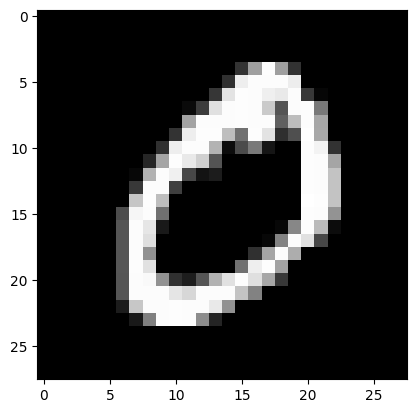

In [3]:
import matplotlib.pyplot as plt

#畫出圖
plt.imshow(x_train[1], cmap="gray")

In [4]:
import numpy as np

# 攤平操作  -1代表由系統幫你算
x_train_1d = x_train.reshape(-1,784)
x_test_1d = x_test.reshape(-1,784)

# 6萬筆 train 1萬筆 test
print(x_train_1d.shape)
print(x_test_1d.shape)

(60000, 784)
(10000, 784)


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#建模 先選擇模型 再設定隱藏層
# Model Layer
layer=[
    # 輸入層
    Dense(128, activation="relu", input_dim=784), # 1維展開784
    # 輸出層
    Dense(10, activation="softmax") # 輸出十種數字
]

model= Sequential(layer) # 建立一個基本model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
# cross entropy 在遠處的斜率比較大

In [7]:
# 確立目標及求解方法：
# 以compile函數定義損失函數(loss)、優化函數(optimizer)及成效衡量指標(mertrics)
# 輸出一個: 0.6 (0.6,0.4) binarycrossentropy p1 log(1/0.6) + p2 log(1/0.4)
# 輸出10個: CategoricalCrossentropy sigma pi log1/qi
from  tensorflow.keras.losses import CategoricalCrossentropy

model.compile(loss="CategoricalCrossentropy",
              optimizer='adam',
              metrics=["accuracy"]
              )

In [8]:
# 消除bias 共有輸出層10個 每個都有自己的答案 要把大家都放在0的起跑點上
# 標準化
x_train_1d_norm = x_train_1d / 255.0
x_test_1d_norm = x_test_1d / 255.0

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
from tensorflow.keras.utils import to_categorical

# 將數據進行類別轉換 (資料類別為1,2,3,4,5,6,7,8,9,0)
y_train_1hot = to_categorical(y_train, num_classes=10)
y_test_1hot = to_categorical(y_test, num_classes=10)

連鎖法則 : 全部微分 = 每一段微分的相乘

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# 看訓練的loss是沒用的 因為他只會越來越低(考試看答案背答案) 要看validation(沒看過的資料 再考一次試)
c = [
    ModelCheckpoint("mlp.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True) # patience 5次沒有變更好 就停止
]
# validation 驗證資料
# batch 批量樣本 (每次選200樣本跑)
# epoch 將整個數據集疊代一次 (共30次)

model.fit(x_train_1d_norm,
     y_train_1hot,
     batch_size=200,
     epochs=30,
     validation_split=0.1,
     callbacks=c)

Epoch 1/30
270/270 [==============================] - 4s 8ms/step - loss: 0.4369 - accuracy: 0.8801 - val_loss: 0.1943 - val_accuracy: 0.9462
Epoch 2/30
 17/270 [>.............................] - ETA: 1s - loss: 0.2372 - accuracy: 0.9297

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


270/270 [==============================] - 3s 10ms/step - loss: 0.1985 - accuracy: 0.9437 - val_loss: 0.1392 - val_accuracy: 0.9608
Epoch 3/30
270/270 [==============================] - 3s 11ms/step - loss: 0.1476 - accuracy: 0.9578 - val_loss: 0.1148 - val_accuracy: 0.9695
Epoch 4/30
270/270 [==============================] - 2s 8ms/step - loss: 0.1174 - accuracy: 0.9664 - val_loss: 0.0999 - val_accuracy: 0.9718
Epoch 5/30
270/270 [==============================] - 2s 9ms/step - loss: 0.0970 - accuracy: 0.9732 - val_loss: 0.0973 - val_accuracy: 0.9710
Epoch 6/30
270/270 [==============================] - 2s 7ms/step - loss: 0.0806 - accuracy: 0.9768 - val_loss: 0.0890 - val_accuracy: 0.9752
Epoch 7/30
270/270 [==============================] - 2s 9ms/step - loss: 0.0692 - accuracy: 0.9798 - val_loss: 0.0836 - val_accuracy: 0.9768
Epoch 8/30
270/270 [==============================] - 2s 9ms/step - loss: 0.0596 - accuracy: 0.9835 - val_loss: 0.0806 - val_accuracy: 0.9775
Epoch 9/30
270/

In [12]:
# sigmoid 函數
# 313/313 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9764
# [0.004473123233765364, 0.9764000177383423]

# softmax 函數
# 313/313 [==============================] - 0s 1ms/step - loss: 0.0037 - accuracy: 0.9754
# [0.0037451598327606916, 0.9753999710083008]

# 加了optimizer以後
# 313/313 [==============================] - 1s 1ms/step - loss: 0.0037 - accuracy: 0.9765
# [0.003731722943484783, 0.9764999747276306]

# 再跑180次以後
# 313/313 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 0.9791
# [0.0035477527417242527, 0.9790999889373779]

model.evaluate(x_test_1d_norm, y_test_1hot)

313/313 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9773


[0.07542488723993301, 0.9772999882698059]

In [13]:
model.predict(x_test_1d_norm)

313/313 [==============================] - 1s 2ms/step


array([[1.60021827e-07, 3.99595601e-09, 1.70326111e-05, ...,
        9.99667406e-01, 2.63541697e-05, 2.58558111e-06],
       [3.88442459e-07, 1.27217660e-04, 9.99833107e-01, ...,
        1.26599154e-12, 7.99359623e-06, 1.79955374e-11],
       [1.24224362e-05, 9.95858967e-01, 7.28767656e-04, ...,
        1.54544960e-03, 1.55662186e-03, 2.00629402e-05],
       ...,
       [9.86326992e-12, 4.00094957e-11, 1.11471266e-11, ...,
        3.32761488e-06, 4.74264016e-05, 9.64701321e-05],
       [9.49160972e-10, 7.17215870e-11, 4.91714742e-12, ...,
        3.26796790e-09, 8.27213262e-06, 1.28548769e-11],
       [4.42736656e-08, 8.51186222e-12, 1.13369696e-10, ...,
        1.63050454e-13, 1.12642318e-09, 3.29830361e-14]], dtype=float32)

In [14]:
pre= model.predict(x_test_1d_norm).argmax(axis=-1)
pre

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [15]:
# demo
n=np.array([[1,2],
      [3,4],
      [6,5]]
           )
# axis=1 返回每列最大值索引
print(n.argmax(axis=1))
# axis=0 返回每行最大值索引
print(n.argmax(axis=0))

# 從最後一個維度中 選出最大值的索引
print(n.argmax(axis=-1))
# 參數不出現時 將陣列平舖
print(n.argmax())

[1 1 0]
[2 2]
[1 1 0]
4


In [16]:
# demo
#判斷陣列中那些位置的值不為0

n=np.array([[5,4],
      [0,6]])

np.nonzero(n)
# 回傳兩組tuple
#第一組告訴你哪幾列有非0值
#第二組告訴你每一列的第幾個位置非0值

(array([0, 0, 1]), array([0, 1, 1]))

In [17]:
# demo 2
a= np.array([[0,0,3],[0,0,0],[9,0,0]])
b= np.array([[0,0,4],[1,0,0],[3,6,0]])
print(a!=b)
# true==0
np.nonzero(a)
# (array([0, 2]), array([2, 0]))
#  x座標         y 座標
# 共兩個不為0的值得位置
np.nonzero(b)

[[False False  True]
 [ True False False]
 [ True  True False]]


(array([0, 1, 2, 2]), array([2, 0, 0, 1]))

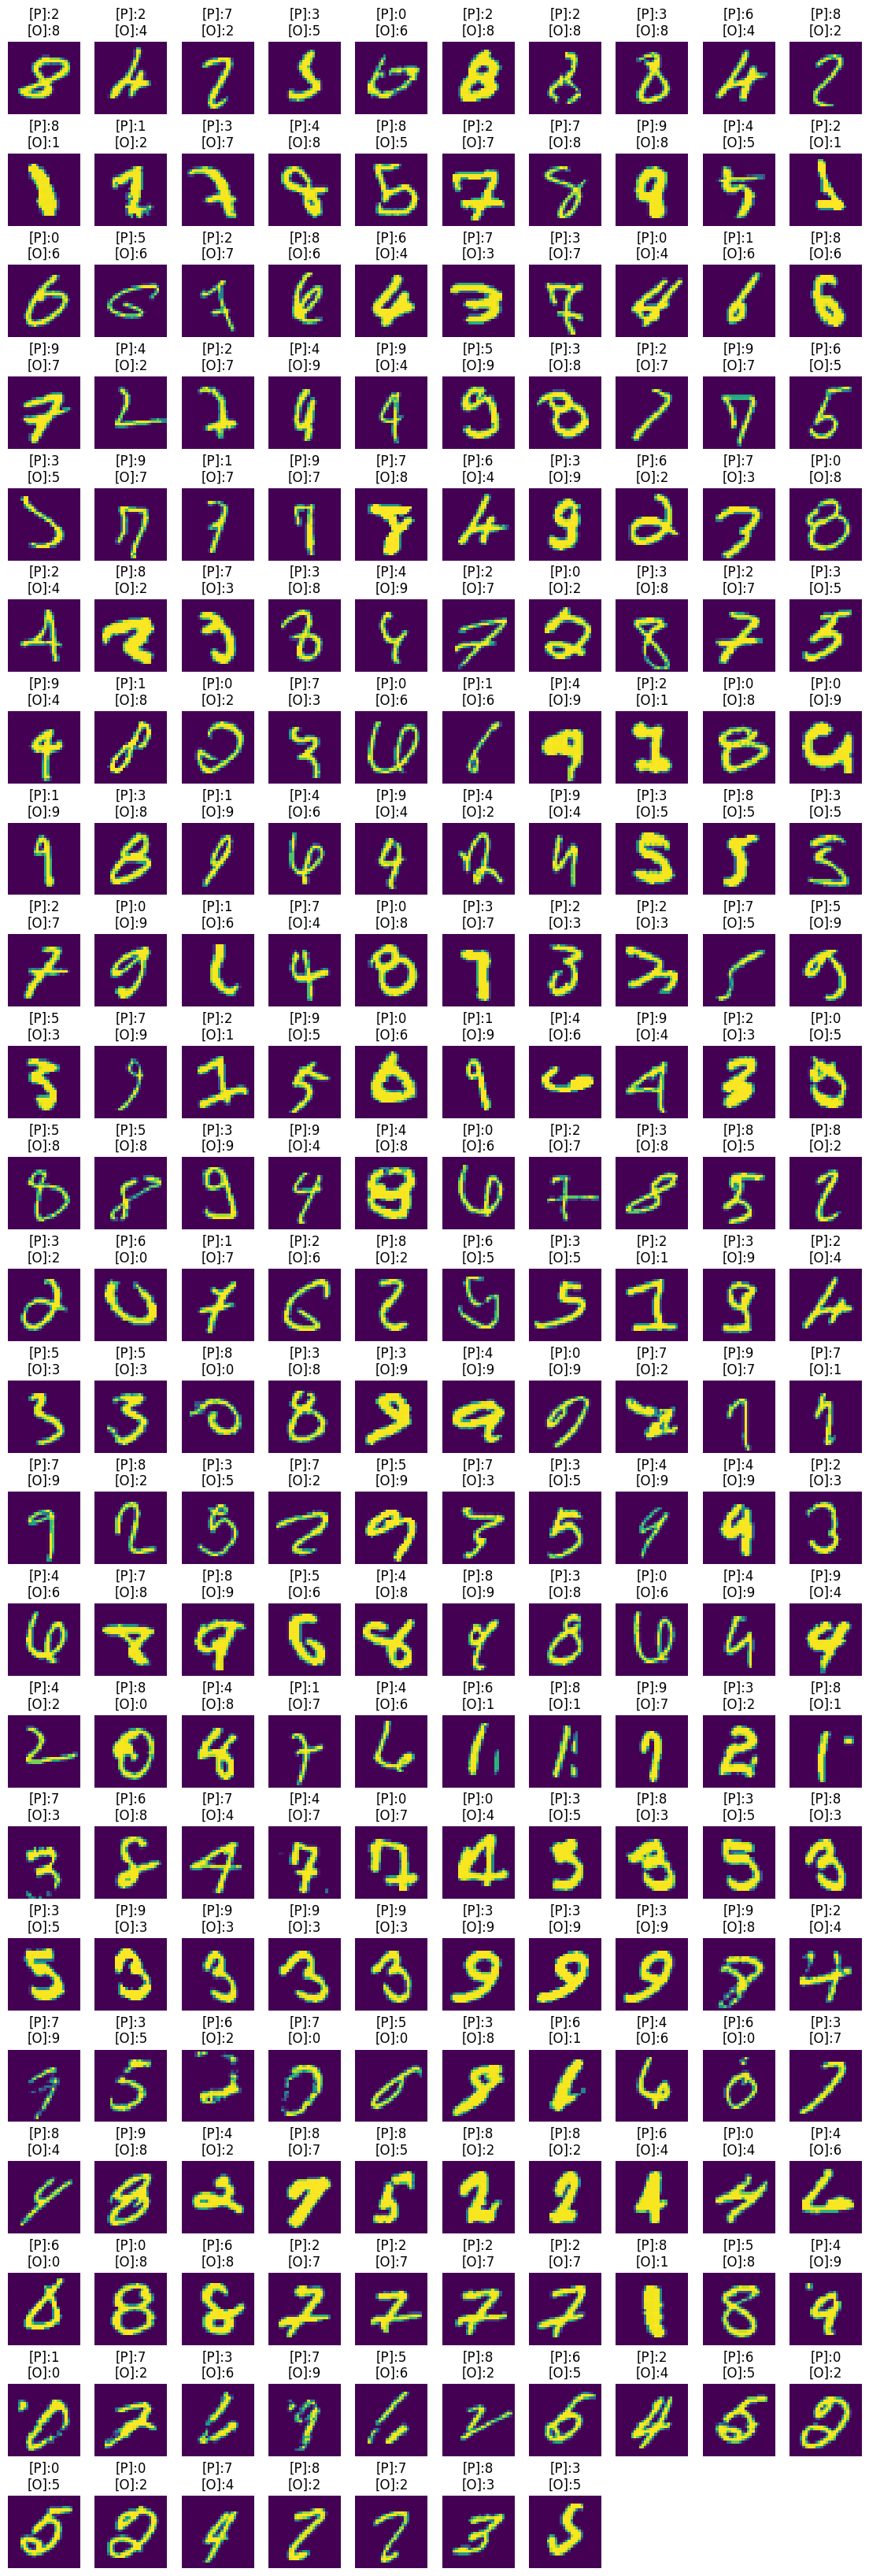

In [18]:
# 比對那些資料式比對錯誤的
idx = np.nonzero(pre != y_test)[0]
false_pre = pre[idx]
false_true = y_test[idx]
false_img = x_test[idx]
width = 10
height= len(idx) // 10 + 1
# Width, height in inches
plt.figure(figsize=(14, 42))
for i in range(len(idx)):
    # plt(總高,總寬,第幾張)
    plt.subplot(height, width, i+1)
    t = "[P]:{}\n[O]:{}".format(false_pre[i],
                                false_true[i]
                                )
    plt.title(t)
    plt.axis("off")
    plt.imshow(false_img[i])